# Analysis and Insights (non-text related)#
> In this notebook, we carried out some analysis on the meta-data of TED Talks and generated some insights. <br>
    We ask the following questions as guiding questions for our analysis:<ol>
    <li><a href='#qn1'>What talks and kind of talks draw the greatest amount of discussion?</a></li>
    <li><a href='#qn2'>How do the topics/tags of TED Talks evolve over the years?</a></li>
    <li><a href='#qn3'>How do people tend to perceive TED Talks, and different kinds of TED Talks?</a></li>


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import ast, pickle,seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
main_df = pd.read_csv('data/raw/ted_main.csv')
main_df['tags'] = main_df.tags.map(ast.literal_eval)
main_df['ratings'] = main_df.ratings.map(ast.literal_eval)

<a id='qn1'></a>
## What talks and kind of talks draw the greatest amount of discussion?
> To quantify the amount of discussion, the most direct way is to use the number of comments (<a href='#qn1.1'>Click to view</a>).<br><br>However, as different talks have different viewership and the difference can be drastic, the nominal value of the number of comments without taking into account the viewership is likely to be an inaccurate measurement of the amount of disucssion drawn. As such, we used a <i>comment-to-view</i> ratio to measure the amount of discussion. (<a href='#qn1.2'>Click to view</a>) <br><br> Futhermore, we analyzed the ratings audience assign to those talks. The top 3 ratings are used in the analysis.

<a id='qn1.1'></a>
### Use the number of comments directly ###

> By using the comments alone, we discovered that the Culture tag stands out along with Global Issues, Religions and Science. The difference is very little with the Culture tag containg 1 more talk than the rest. <br><br>
    With regards to the audience rating, Inspiring stands out rather siginificantly.

In [7]:
# use comments

top10comments = main_df.sort_values('comments',ascending=False)[['title','comments','views','tags','ratings']][:10]
top10comments

,title,comments,views,tags,ratings
96,Militant atheism,6404,4374792,"[God, atheism, culture, religion, science]","[{'id': 3, 'name': 'Courageous', 'count': 3236..."
0,Do schools kill creativity?,4553,47227110,"[children, creativity, culture, dance, educati...","[{'id': 7, 'name': 'Funny', 'count': 19645}, {..."
644,Science can answer moral questions,3356,3433437,"[culture, evolutionary psychology, global issu...","[{'id': 8, 'name': 'Informative', 'count': 923..."
201,My stroke of insight,2877,21190883,"[biology, brain, consciousness, global issues,...","[{'id': 22, 'name': 'Fascinating', 'count': 14..."
1787,How do you explain consciousness?,2673,2162764,"[brain, consciousness, neuroscience, philosophy]","[{'id': 25, 'name': 'OK', 'count': 280}, {'id'..."
954,Taking imagination seriously,2492,1832930,"[art, cities, culture, data, design, technolog...","[{'id': 23, 'name': 'Jaw-dropping', 'count': 3..."
840,On reading the Koran,2374,1847256,"[TEDx, culture, global issues, journalism, rel...","[{'id': 3, 'name': 'Courageous', 'count': 488}..."
1346,Your body language may shape who you are,2290,43155405,"[body language, brain, business, psychology, s...","[{'id': 23, 'name': 'Jaw-dropping', 'count': 3..."
661,The danger of science denial,2272,1838628,"[global issues, medicine, religion, science, w...","[{'id': 3, 'name': 'Courageous', 'count': 702}..."
677,How great leaders inspire action,1930,34309432,"[TEDx, business, entrepreneur, leadership, suc...","[{'id': 21, 'name': 'Unconvincing', 'count': 9..."


In [8]:
# what kind of talks are these
all_tags = []
for tags in top10comments.tags:
    all_tags.extend(tags)
pd.Series(all_tags).value_counts()[:10]

culture          5
global issues    4
religion         4
science          4
brain            3
psychology       2
philosophy       2
success          2
TEDx             2
business         2
dtype: int64

In [9]:
# how people find these talks
all_ratings = []
for ratings in top10comments.ratings:
    ratings = sorted([(x['name'],x['count']) for x in ratings],key=lambda x:x[1],reverse=True)
    top3ratings = [x[0] for x in ratings[:3]]
    all_ratings.extend(top3ratings)
pd.Series(all_ratings).value_counts()

Inspiring       9
Persuasive      5
Fascinating     5
Informative     4
Beautiful       2
Courageous      2
Jaw-dropping    1
OK              1
Funny           1
dtype: int64

<a id='qn1.2'></a>
### Use comment-to-view ratio ###

> When using the comment-to-view ratio, the results are very different. <br><br>
    Among the top 10 talks, there is only one talk that appears in both lists, <i>Militant atheism</i>, indicating that it is indeed a talk that draws a lot of discussion.<br><br>
    By comparing the viewership of the top 10 talks in the two lists, we discovered that the viewership does have a signifcant impact on the number of comments. The viewership in the list in the previous section is ranges from 1.8 Million to 47 Millions, while that ranges from 2.9k to 4.3 Million. It proves that using the comments alone will lead to biased conclusions.<br><br>
    Looking at the tag and the rating, Culture still stands out but more significantly and Insipring remains as the most rated attributes. <br><br>It indicates that Culture related talks do make people to think more and encourage them to share their point of views. --> Therefore, TED Talks should try to publish more Culture related talks. <br><br>
    It is also interesting to find out if there is other reasons why Culture and Inspiring are ranked the top in both cases. Are there a lot of Culture talks and Inspiring talks in the first place? 

In [10]:
main_df['comment-view-ratio'] = main_df.comments/main_df.views

In [11]:
# use comments/views ratio
top10ratio = main_df.sort_values('comment-view-ratio',ascending=False)[['title','comments','views','comment-view-ratio','tags','ratings']][:10]
top10ratio

,title,comments,views,comment-view-ratio,tags,ratings
744,The case for same-sex marriage,649,292395,0.002220,"[God, LGBT, culture, government, law, love, re...","[{'id': 25, 'name': 'OK', 'count': 100}, {'id'..."
803,E-voting without fraud,834,543551,0.001534,"[culture, democracy, design, global issues, go...","[{'id': 25, 'name': 'OK', 'count': 111}, {'id'..."
96,Militant atheism,6404,4374792,0.001464,"[God, atheism, culture, religion, science]","[{'id': 3, 'name': 'Courageous', 'count': 3236..."
694,Inside a school for suicide bombers,1502,1057238,0.001421,"[TED Fellows, children, culture, film, politic...","[{'id': 23, 'name': 'Jaw-dropping', 'count': 3..."
954,Taking imagination seriously,2492,1832930,0.001360,"[art, cities, culture, data, design, technolog...","[{'id': 23, 'name': 'Jaw-dropping', 'count': 3..."
840,On reading the Koran,2374,1847256,0.001285,"[TEDx, culture, global issues, journalism, rel...","[{'id': 3, 'name': 'Courageous', 'count': 488}..."
876,Curating humanity's heritage,555,439180,0.001264,"[anthropology, storytelling]","[{'id': 21, 'name': 'Unconvincing', 'count': 5..."
1787,How do you explain consciousness?,2673,2162764,0.001236,"[brain, consciousness, neuroscience, philosophy]","[{'id': 25, 'name': 'OK', 'count': 280}, {'id'..."
661,The danger of science denial,2272,1838628,0.001236,"[global issues, medicine, religion, science, w...","[{'id': 3, 'name': 'Courageous', 'count': 702}..."
561,Dance to change the world,595,481834,0.001235,"[culture, dance, entertainment, global issues,...","[{'id': 3, 'name': 'Courageous', 'count': 141}..."


In [12]:
# what kind of talks are these
all_tags = []
for tags in top10ratio.tags:
    all_tags.extend(tags)
pd.Series(all_tags).value_counts()[:10]

culture          7
global issues    4
religion         4
politics         3
design           2
science          2
government       2
God              2
technology       2
anthropology     1
dtype: int64

In [13]:
# how people find these talks
all_ratings = []
for ratings in top10ratio.ratings:
    ratings = sorted([(x['name'],x['count']) for x in ratings],key=lambda x:x[1],reverse=True)
    top3ratings = [x[0] for x in ratings[:3]]
    all_ratings.extend(top3ratings)
pd.Series(all_ratings).value_counts()

Inspiring       7
Informative     5
Persuasive      4
Courageous      4
Beautiful       3
Fascinating     2
Obnoxious       2
Ingenious       1
OK              1
Jaw-dropping    1
dtype: int64

<a id='qn2'></a>
## How do the topics/tags of TED Talks evolve over the years? ##

> In this section, we first wanna answer the last question in Qn1 analysis: <i>Are there many Culture talks in TED Talk in the first place, that renders it being the tag that draws the most discussion?</i> by counting the number of talks per tag (<a href='#qn2.1'>Click to view</a>)  <br><br>
   Followed that, we broken down the number of talks per tag by the publishing year to observe the trend. Knowing that the number of total talks will only increase over the years, we used the % value instead of the nominal count value. (<a href='#qn2.2'>Click to view</a>)

<a id='qn2.1'></a>
### How many talks are there for each tag ###

> We counted the number of talks per tag and discovered that Technology is the tag with the most talks instead of Culture, and Culture only ranks the 4th. <br><br>
    This shows that Culture talks are indeed able to draw discussions among the audience.

In [14]:
# https://stackoverflow.com/questions/27263805/pandas-column-of-lists-create-a-row-for-each-list-element

lst_col = 'tags'

talk_tag_df = pd.DataFrame({
      col:np.repeat(main_df[col].values, main_df[lst_col].str.len())
      for col in main_df.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(main_df[lst_col].values)})[main_df.columns]

In [15]:
mostTalkTags = talk_tag_df.tags.value_counts()[:10]
mostTalkTags

technology       727
science          567
global issues    501
culture          486
TEDx             450
design           418
business         348
entertainment    299
health           236
innovation       229
Name: tags, dtype: int64

<a id='qn2.2'></a>
### Proportion of Talks per Tag over Time ### 

> Considering that the TED Talks contains many hundreds of tags, we only used the top 10 tags with most talks in our analysis. <br><br>
    The bar chart shows the distribution of talks across the tags in different years and the line chart shows the change of % acorss the years. <br><br>
    There are some interesting findings: <ul>
    <li>The % of Culture talks decreases drastically over the years, especially from 2013 onwards, while it was the top one tag in 2006. On the other hand, the % of Innovation talks increases drastically over the years, with that of Science and Technology remaining with similar values. The decrease in % of Culture talks may be because the fast pace of technology advancement has led to many innovations over the years, resulting in a huge increase in the number of talks on those topics. Culture, on the other hand, may have new talks published as well, but the number is too little compared to Innovation, Science and Technology. </li>
    <li> Interestingly, the % of Entertainment talks also decreases over the years. As the term Entertainment is very broad, one needs to investigate further on some specific talks to figure out the reasons behind the trend </li>
    </ul> However, from Qn 1 we found that the Culture talks can effectively draw discussions from the audience, TED Talks should not neglect this topic and focuses on others. It should try to introduce more Culture talks to help educate the audience the culture aspect of mankind, especially in this technological era.

In [16]:
publish_tag_df = talk_tag_df[['published_date','tags']]
publish_tag_df['published_date'] = publish_tag_df['published_date'].map(int)
publish_tag_df['published_date'] = pd.to_datetime(publish_tag_df['published_date'],unit='s').map(lambda x:x.year)

In [17]:
publish_mainTag_df= publish_tag_df[(publish_tag_df.tags.isin(mostTalkTags.index))]
publish_mainTag_df=publish_mainTag_df[publish_mainTag_df.tags!="TEDx"]
publish_mainTag_df.tags.unique()

array(['culture', 'global issues', 'science', 'technology',
       'entertainment', 'business', 'health', 'design', 'innovation'],
      dtype=object)

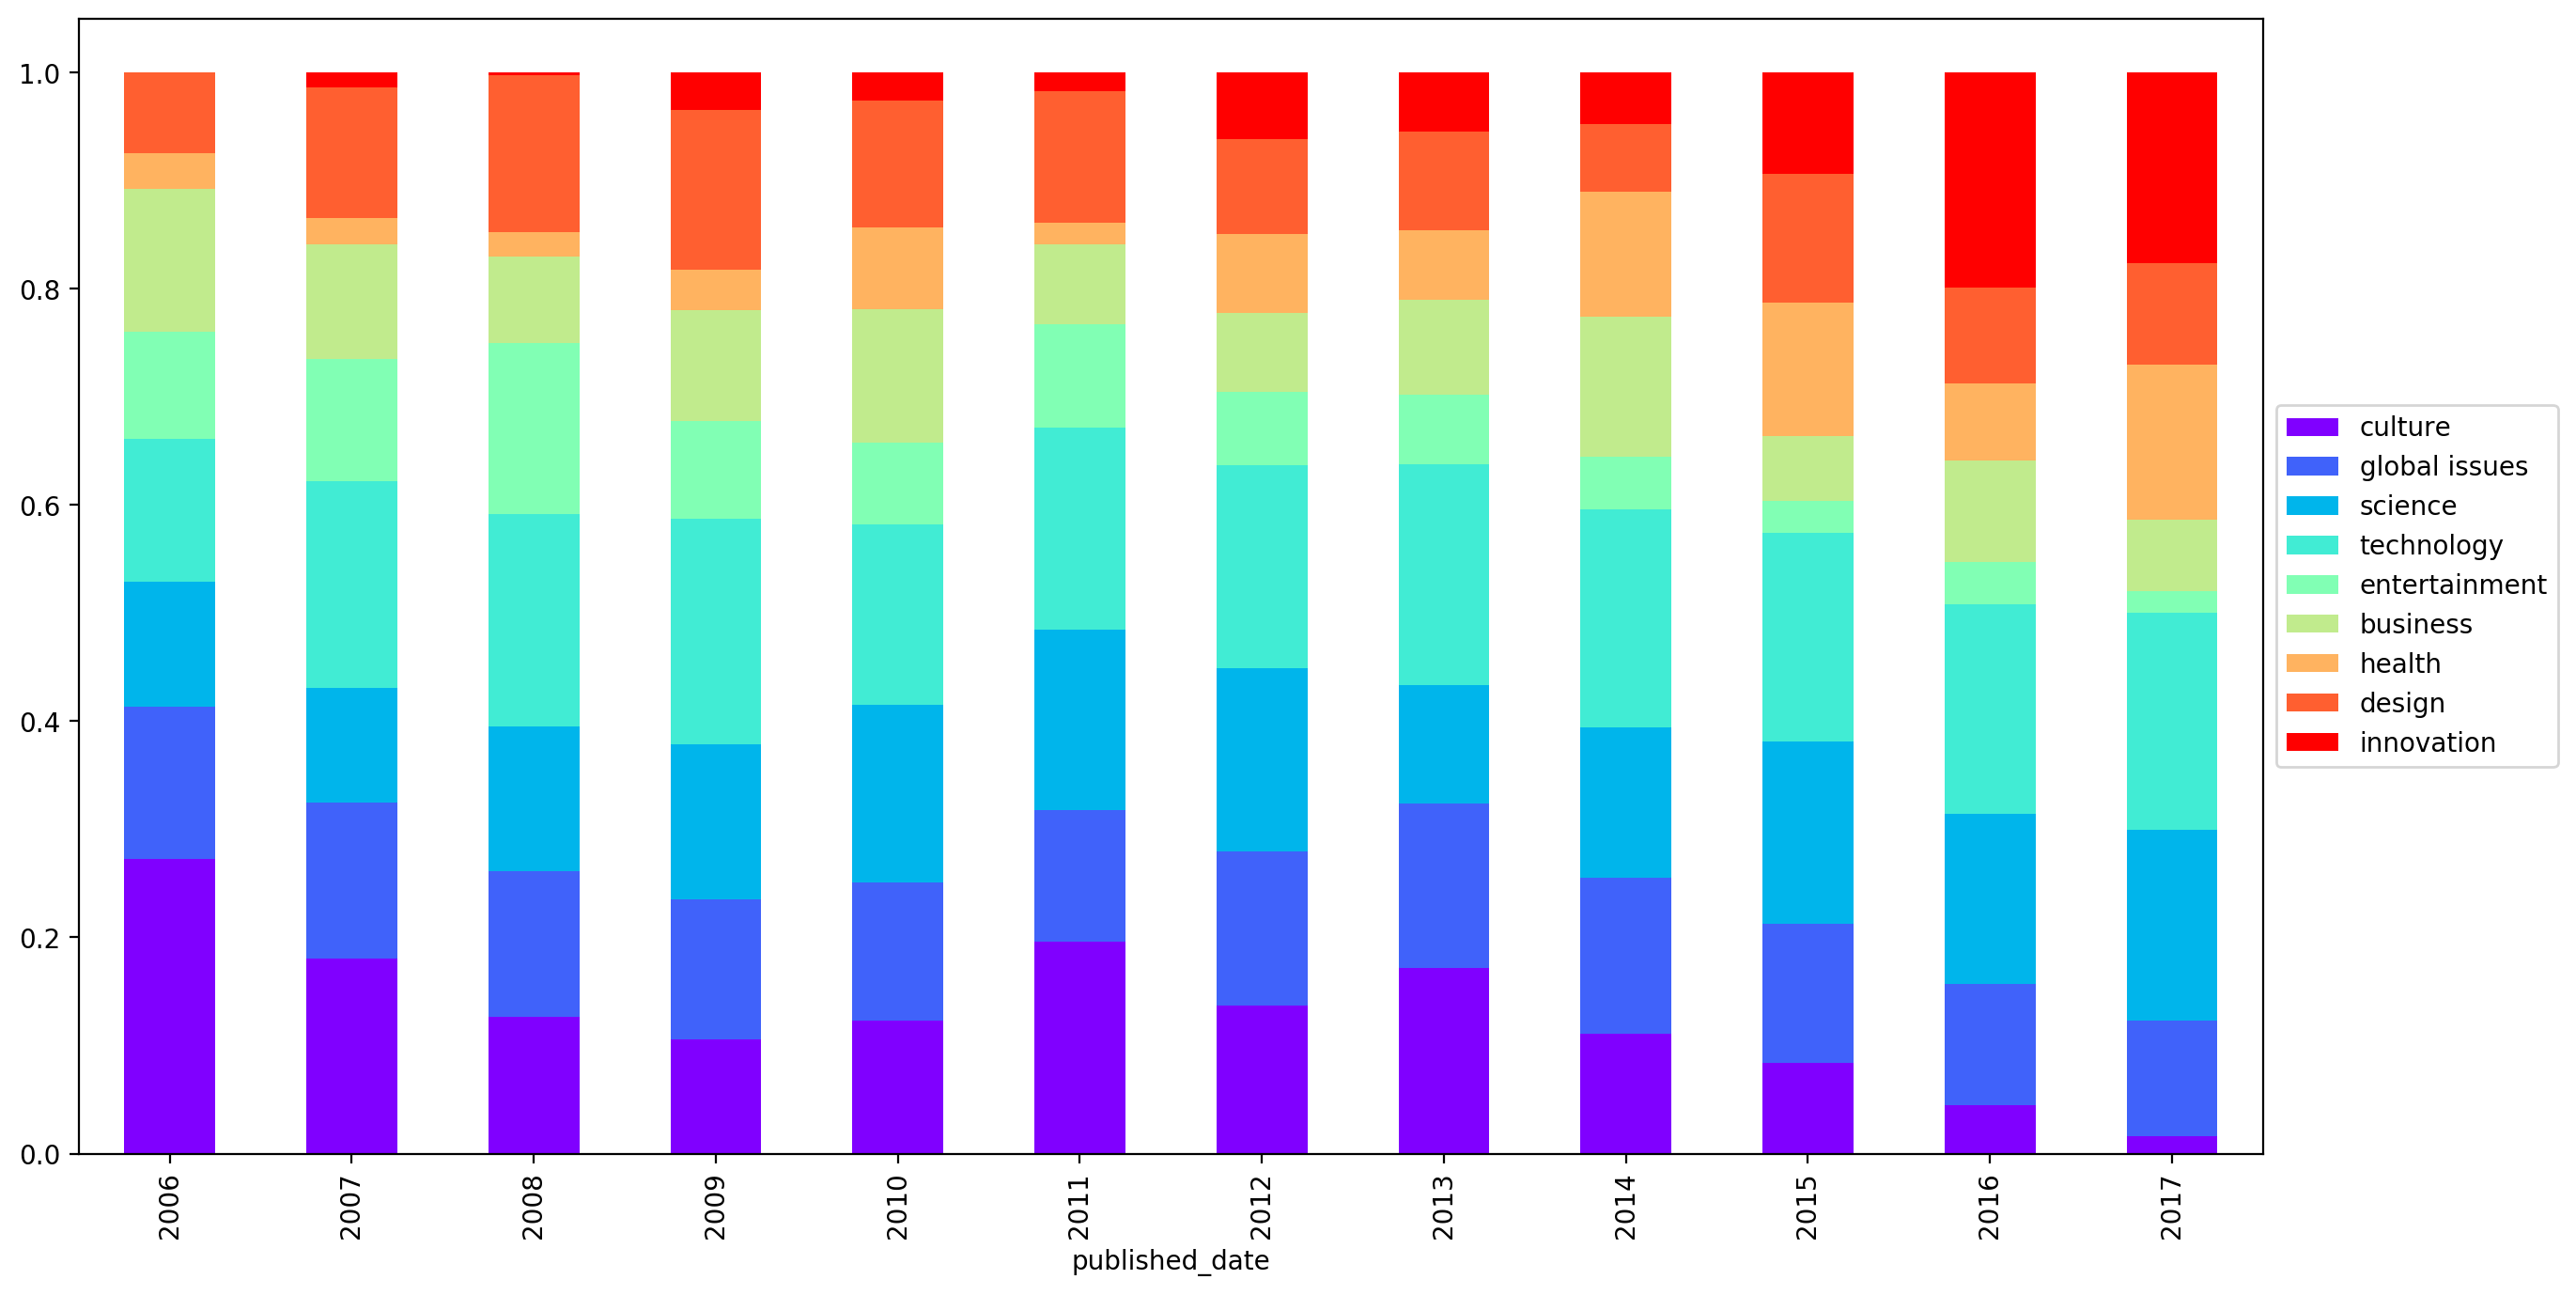

In [23]:
fig, ax = plt.subplots(figsize=(15,8),dpi=200)
ctab = pd.crosstab([publish_mainTag_df['published_date']], publish_mainTag_df['tags']).apply(lambda x: x/x.sum(), axis=1)
ctab[publish_mainTag_df.tags.unique()].plot(kind='bar',stacked=True, colormap='rainbow',ax=ax).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

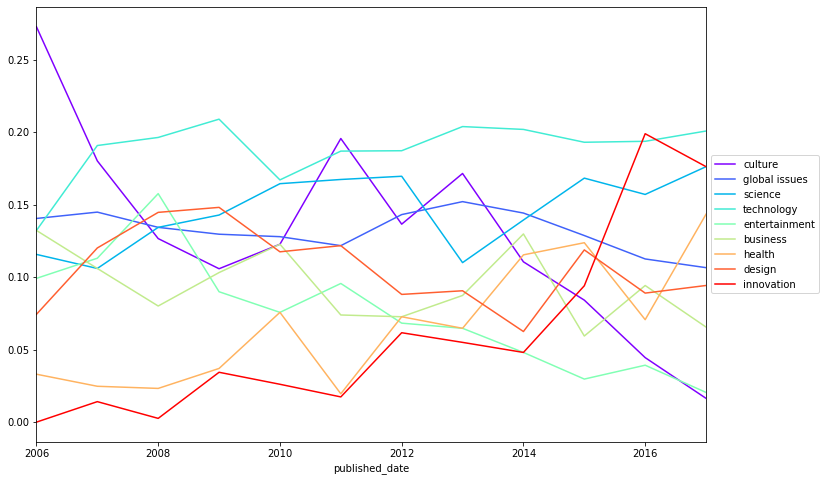

In [22]:
# proportion

ctab[publish_mainTag_df.tags.unique()].plot(kind='line', colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<a id='qn3'></a>
## How do people tend to perceive TED Talks, and different kinds of TED Talks? ##

> For the last question, similar to Qn 2, we first looked at the top ratings of all talks, as there are 14 ratings for each talk. We counted the number of talks per rating to see how people tend to perceive TED Talks. (<a href='#qn3.1'>Click to view</a>)<br><br>
    After that, we look at the ratings given to Performance talks and Non-Performance Talks. Please refer to the notebook <i>Preprocessing and Filtering Transcripts</i> to see how we categorized them.(<a href='#qn3.2'>Click to view</a>)

In [24]:
rating_categories = [x['name'] for x in main_df.ratings[0]]
len(rating_categories), rating_categories

(14,
 ['Funny',
  'Beautiful',
  'Ingenious',
  'Courageous',
  'Longwinded',
  'Confusing',
  'Informative',
  'Fascinating',
  'Unconvincing',
  'Persuasive',
  'Jaw-dropping',
  'OK',
  'Obnoxious',
  'Inspiring'])

In [25]:
rating_df = pd.DataFrame(columns=rating_categories)
for i, row in main_df.iterrows():
    row_data = {x['name']:[x['count']] for x in row['ratings']}
    
    rating_df = rating_df.append(
        pd.DataFrame.from_dict(row_data)
    )
rating_df = rating_df.astype(int)

<a id='qn3.1'></a>
### Top ratings with the talk count ###

> We discovered that most talks are rated Inspiring the most, followed by Informative. These two ratings together capture 62.8% of talks, indicating they are indeed the dominant ratings. As the slogan of TED Talks is "Ideas worth spreading". With new ideas introduced in the talks, it is not suprising that the audience would find most talks inspiring and informative. It also explains, to a certain extent, why we found Inspiring ranking the first for both cases in Qn 1.

In [26]:
# find the category of top rating for each talk
# find the highest rating for each talk: https://stackoverflow.com/questions/29919306/find-the-column-name-which-has-the-maximum-value-for-each-row
# convert a series obj to a data frame: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_frame.html
# count number of occurences of each value: https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column
topRating = rating_df.idxmax(axis=1)
topRating.value_counts()

Inspiring       877
Informative     725
Fascinating     266
Funny           163
Beautiful       153
Ingenious       101
Courageous       85
Persuasive       83
Jaw-dropping     53
Unconvincing     23
Longwinded        8
OK                7
Obnoxious         4
Confusing         2
dtype: int64

<a id='qn3.2'></a>
### Rating between Performance and Non-performance talks ###

> We calculated the mean rating % value for each rating for both performance and non-performance talks, and plotted a bar chart. <br><br> From the bar chart, we can see there are a few ratings with significant differences in the mean percentage rating values: <ul>
    <li> For non-performance talks, the mean % rating of Informative and Persuasive is much higher than that of Performance talks. </li>
    <li> For performance talks, the mean % rating of Beautiful, Jaw-dropping and Funny is much higher than that of non-performance talks. </li></ul>It is not surprising to find out the above two points, as a performance is not meant to provide information or persuade the audience, but to showcase the talents and skills of the performer, thus tends to be more beautiful, jaw-dropping and funny. Similarly, the main purpose of a speech talk is to tell a story, offer new information, share ideas and convince audience, and there is unlikely to be something special or beautiful about the speech. After all, it is still a speech. 

In [72]:
rating_ratio_df = rating_df.apply(lambda x:x/x.sum(),axis=1)
rating_ratio_df.reset_index(drop=True,inplace=True)
rating_ratio_df['url'] = main_df['url']

In [99]:
import pickle
non_performance_df = pickle.load(open('data/pickle/filtered_talks.p','rb'))

In [100]:
rating_ratio_df['type'] = rating_ratio_df.apply(lambda x:'non-performance' if x['url'] in non_performance_df.url.values else 'performance',axis=1)

In [101]:
rating_ratio_df.groupby('type').count()

,Beautiful,Confusing,Courageous,Fascinating,Funny,Informative,Ingenious,Inspiring,Jaw-dropping,Longwinded,OK,Obnoxious,Persuasive,Unconvincing,url
type,,,,,,,,,,,,,,,
non-performance,2432,2432,2432,2432,2432,2432,2432,2432,2432,2432,2432,2432,2432,2432,2432
performance,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118


In [102]:
type_meanRating = rating_ratio_df.groupby('type').mean().T
type_meanRating.head()

type,non-performance,performance
Beautiful,0.076919,0.143368
Confusing,0.011895,0.015030
Courageous,0.065285,0.056777
Fascinating,0.127295,0.120412
Funny,0.049638,0.065265


In [103]:
type_meanRating = type_meanRating.reset_index()
type_meanRating['diff'] = abs(type_meanRating['non-performance'] - type_meanRating['performance'])
type_meanRating = type_meanRating.sort_values('diff',ascending=False)
type_meanRating.drop('diff',axis=1,inplace=True)

In [105]:
type_meanRating.head()

type,index,non-performance,performance
5,Informative,0.167885,0.092920
0,Beautiful,0.076919,0.143368
12,Persuasive,0.087317,0.063538
8,Jaw-dropping,0.046958,0.065889
4,Funny,0.049638,0.065265


In [106]:
type_meanRating_pairwise = pd.melt(type_meanRating, id_vars="index", var_name="type", value_name="mean rating ratio")
type_meanRating_pairwise = type_meanRating_pairwise.rename({'index':'feeling label'},axis=1)

In [107]:
compare = type_meanRating_pairwise[type_meanRating_pairwise.type!='overall']
compare.head()

,feeling label,type,mean rating ratio
0,Informative,non-performance,0.167885
1,Beautiful,non-performance,0.076919
2,Persuasive,non-performance,0.087317
3,Jaw-dropping,non-performance,0.046958
4,Funny,non-performance,0.049638


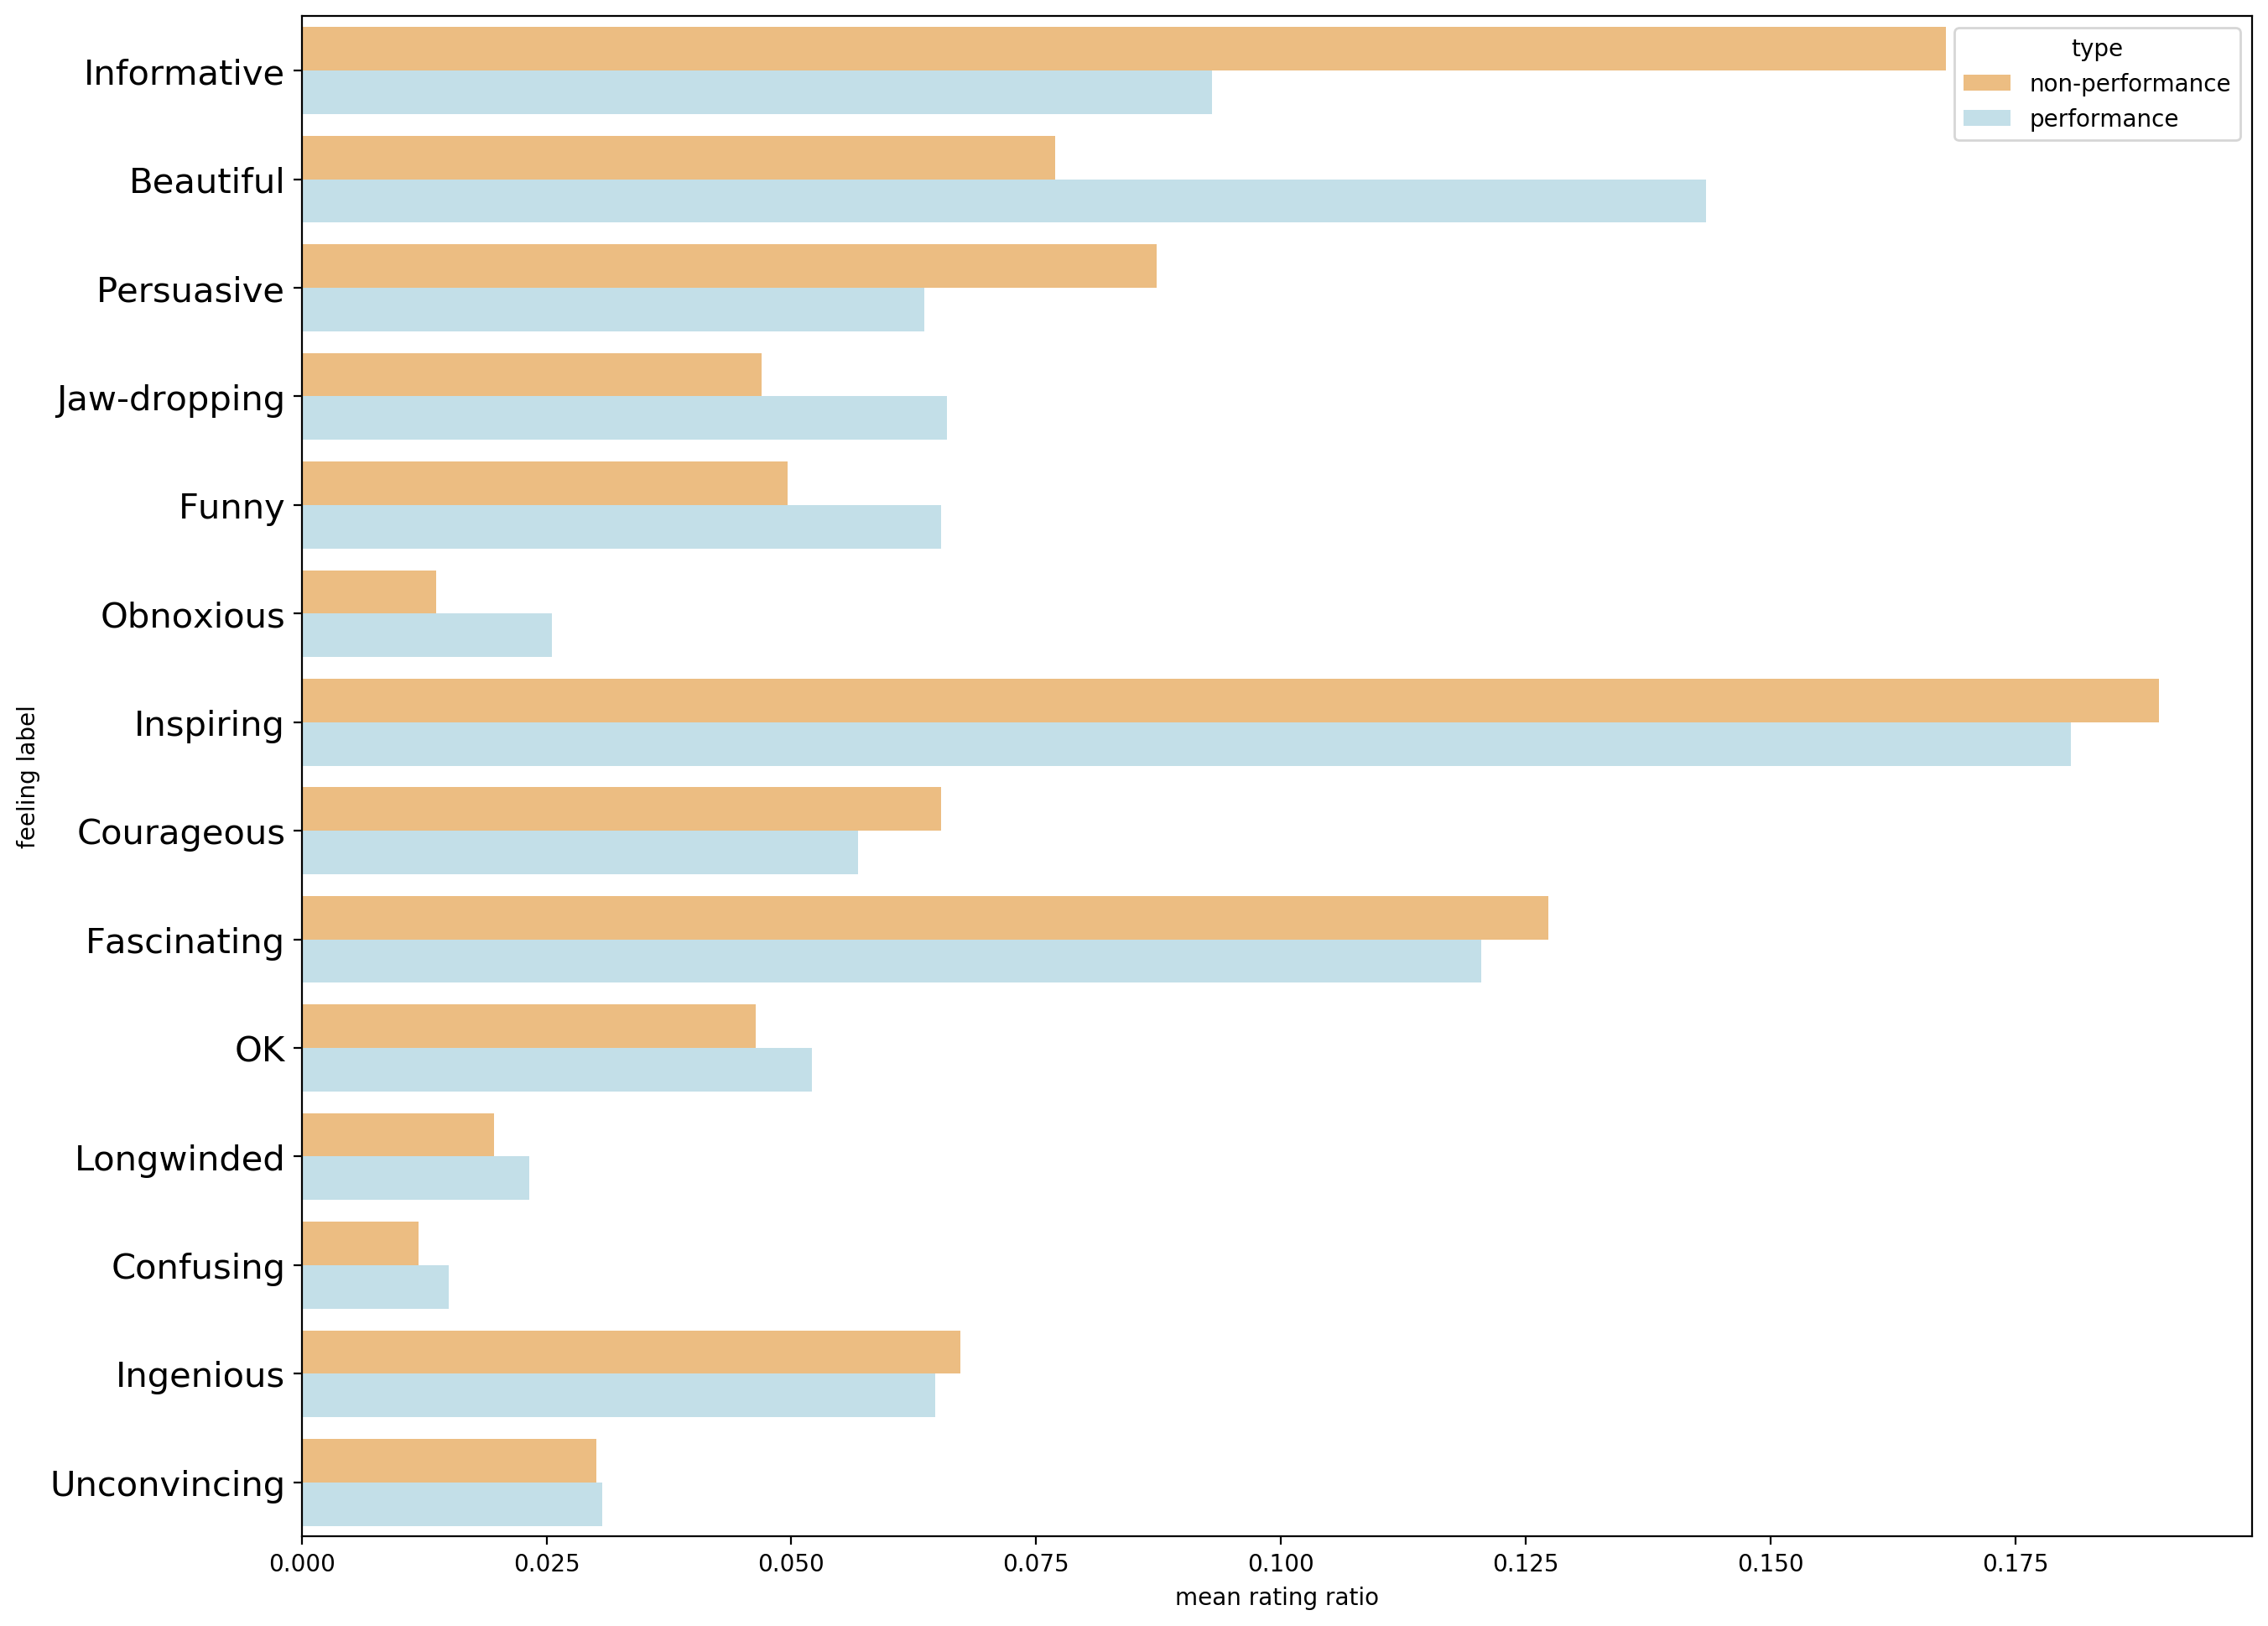

In [108]:
f, ax = plt.subplots(figsize=(15,12),dpi=200)
sns.color_palette("husl", 8)
chart = sns.barplot(y="feeling label", x="mean rating ratio", hue='type', data=compare, orient='h',
           palette='RdYlBu')
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
chart.figure.savefig("chart.png")
# chart
# sns.barplot(x='feeling label',y='mean rating ratio',hue='type', data=type_meanRating2, figsize=(15,8))